In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from landlab.components import landformClassifier
from landlab.plot.imshow import imshow_grid
from landlab.grid import RasterModelGrid
from osgeo import gdal
from netCDF4 import Dataset
import xarray as xr
import pickle

In [3]:
path_to_simulation = '/run/user/1000/gvfs/smb-share:server=134.2.5.43,share=esd01/data/mschmid/model_runs/runningSimus/paper_2/trace_simulations/Ff_02/realistic_base_elevation/precip_trace/higher_K/na/'
path_to_netcdf     = 'll_output/NC/'
number_of_netcdf   = 'output4999900__49999.nc'

full_path = path_to_simulation + path_to_netcdf + number_of_netcdf

In [4]:
dataset = Dataset(full_path)

In [5]:
elevation_matrix = dataset['topographic__elevation'][:][0]
landform_matrix  = dataset['landform__ID'][:][0]

In [10]:
valley_indicies = np.array([])
top_indicies = np.array([])
for lf in np.unique(landform_matrix):
    lf = str(int(lf))
    if lf[-2] == '6':
        print('Current Landform: ' + lf)
        _valley_indices = np.array(np.where(landform_matrix.flatten() == int(lf)))
        valley_indicies = np.append(valley_indicies, _valley_indices)
        
    if lf[-2] == '1':
        print('Current Landform: ' + lf)
        _top_indices = np.array(np.where(landform_matrix.flatten() == int(lf)))
        top_indicies = np.append(top_indicies, _top_indices)
        
    else:
        print('No Landform found')
        
valley_indicies = [int(i) for i in valley_indicies]
valley_mask = np.ones(np.shape(landform_matrix))
valley_mask = valley_mask.flatten()
valley_mask[valley_indicies] = 0

top_indicies = [int(i) for i in top_indicies]
top_mask      = np.ones(np.shape(landform_matrix))
top_mask = top_mask.flatten()
top_mask[top_indicies] = 0
  
valley_landforms = np.ma.array(landform_matrix.flatten(), mask = valley_mask)
valley_landforms[valley_indicies] = 1
valley_landforms = valley_landforms.reshape(101,101)

top_landforms = np.ma.array(landform_matrix.flatten(), mask = top_mask)
top_landforms[top_indicies] = 1
top_landforms = top_landforms.reshape(101,101)

Current Landform: 710
No Landform found
No Landform found
No Landform found
No Landform found
No Landform found
Current Landform: 760
No Landform found
Current Landform: 810
No Landform found
No Landform found
No Landform found
No Landform found
No Landform found
Current Landform: 860
No Landform found


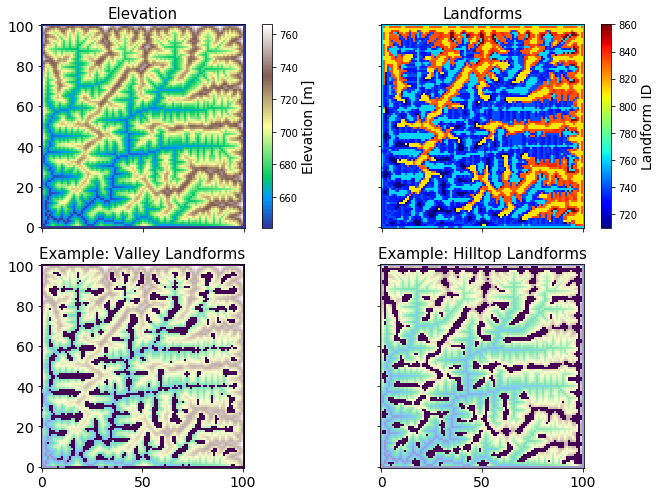

In [50]:
fig, ax = plt.subplots(2,2, 
                      figsize = [10,7], 
                      sharex = True, 
                      sharey = True)

####DATA######
#Elevation
cbar = ax[0,0].imshow(elevation_matrix, origin = 'lower', cmap = 'terrain')
cbar_h = fig.colorbar(cbar, ax = ax[0,0])
cbar_h.set_label('Elevation [m]', fontsize = 14)

#Landforms
cbar = ax[0,1].imshow(landform_matrix, origin = 'lower', cmap = 'jet')
cbar_h = fig.colorbar(cbar, ax = ax[0,1])
cbar_h.set_label('Landform ID', fontsize = 14)

#Select Landforms
ax[1,0].imshow(elevation_matrix, origin = 'lower', cmap = 'terrain', alpha = 0.5)
ax[1,0].imshow(valley_landforms, origin = 'lower',  alpha = 1)

ax[1,1].imshow(elevation_matrix, origin = 'lower', cmap = 'terrain', alpha = 0.5)
ax[1,1].imshow(top_landforms, origin = 'lower')


####LAYOUT#####
for axes in ax.flatten():
    axes.axes.tick_params(labelsize = 14)
    
    
###LABELS######
ax[0,0].set_title('Elevation', fontsize = 15)
ax[0,1].set_title('Landforms', fontsize = 15)
ax[1,0].set_title('Example: Valley Landforms', fontsize = 15)
ax[1,1].set_title('Example: Hilltop Landforms', fontsize = 15)

plt.tight_layout()
plt.savefig('landform_example.pdf')
plt.savefig('landform_example.png', dpi = 420)